In [18]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import GEM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
df1 = pd.read_csv(
    "../data/pct_fed_intmodel_simpleadaptations_rationing_humans.csv", comment="#"
)
df2 = pd.read_csv("../results/solar+wind-NW-year1.csv")

In [20]:
df = pd.merge(df1, df2, how="outer", left_on="country_name", right_on="country")

In [21]:
df["continent"] = df["continent"].astype("category")

In [22]:
color_map = {
    "Africa": "#3A913F",
    "Asia": "#6c7075",
    "Europe": "#e06234",
    "North America": "#F0B323",
    "Oceania": "#3D87CB",
    "South America": "#ec9c76",
}

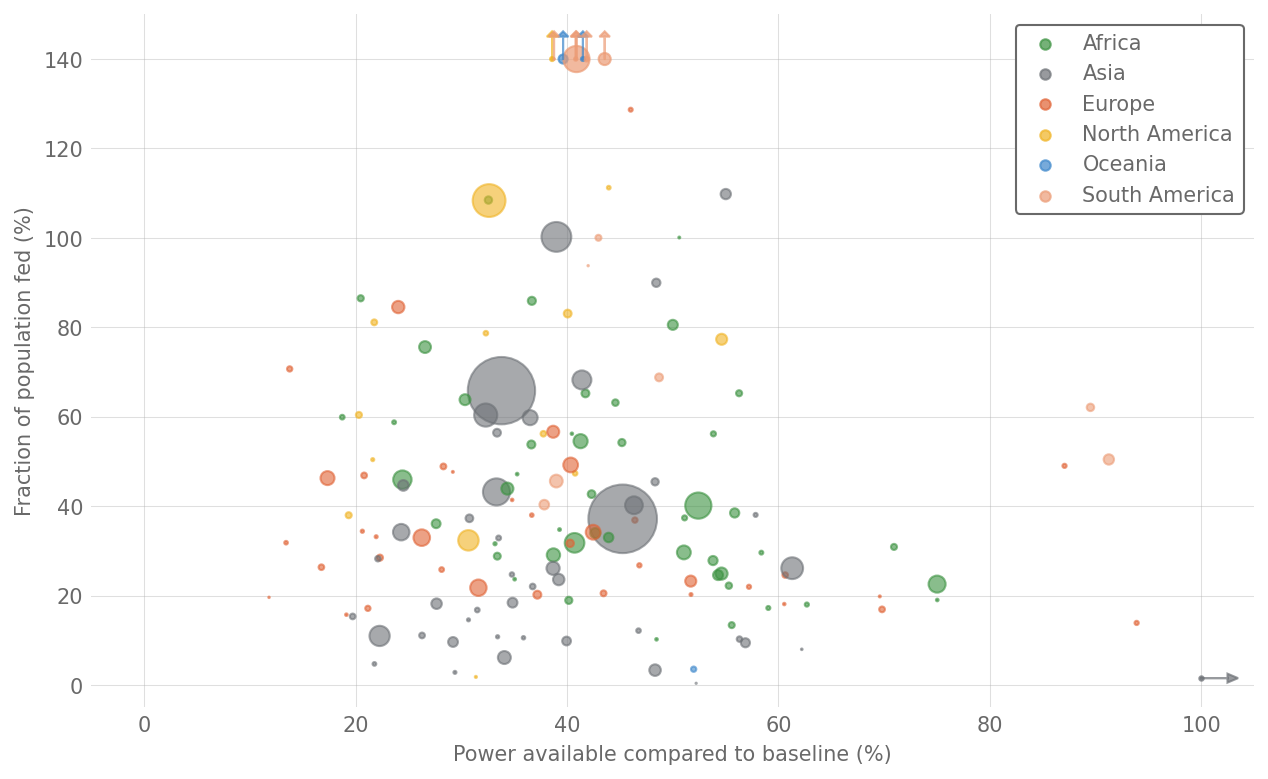

In [51]:
outlier_threshold_y = 140
outlier_threshold_x = 100

x_var = "solar+wind_pct_NW"
y_var = "pct_fed"

outliers_y = df[df[y_var] > outlier_threshold_y]
outliers_x = df[df[x_var] > outlier_threshold_x]

# Filter out the main data points
df_filtered = df[
    (df[y_var] <= outlier_threshold_y) & (df[x_var] <= outlier_threshold_x)
]

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Regular scatter plot
plt.scatter(
    df_filtered[x_var],
    df_filtered[y_var],
    c=df_filtered["continent"].map(color_map),
    s=3*df_filtered["population"],
    alpha=0.6,
)

# # Print country_names next to the points
# for i, row in df_filtered.iterrows():
#     if row.country_name in ["United States of America", "China", "India"]:
#         plt.text(
#             row[x_var] + 2,
#             row[y_var],
#             row["country_name"],
#             verticalalignment="center",
#             horizontalalignment="left",
#             fontsize=8,
#         )

# Outliers as upward arrows
plt.scatter(
    outliers_y[x_var],
    np.minimum(outlier_threshold_y, outliers_y[y_var]),
    c=outliers_y["continent"].map(color_map),
    alpha=0.7,
    s=3*outliers_y["population"],
)
# add upward arrows
for i, row in outliers_y.iterrows():
    plt.arrow(
        row[x_var],
        outlier_threshold_y,
        0,
        5,
        head_width=1,
        head_length=1.2,
        fc=color_map[row["continent"]],
        ec=color_map[row["continent"]],
        alpha=0.7,
    )

# Outliers as rightward arrows
plt.scatter(
    np.minimum(outlier_threshold_x, outliers_x[x_var]),
    outliers_x[y_var],
    c=outliers_x["continent"].map(color_map),
    alpha=0.7,
    s=3*outliers_x["population"],
)
# add rightward arrows
for i, row in outliers_x.iterrows():
    plt.arrow(
        outlier_threshold_x,
        row[y_var],
        2.5,
        0,
        head_width=2,
        head_length=1,
        fc=color_map[row["continent"]],
        ec=color_map[row["continent"]],
        alpha=0.7,
    )


# Legend
# Create legend handles (one for each category)
handles = [
    plt.scatter([], [], color=color, label=continent, alpha=0.7, s=100)
    for continent, color in color_map.items()
]

# Add the legend
plt.legend(handles=handles)

plt.xlabel("Power available compared to baseline (%)")
plt.ylabel("Fraction of population fed (%)")
plt.grid(True)
plt.xlim(-5, outlier_threshold_x + 5)
plt.ylim(-5, outlier_threshold_y + 10)
plt.show()